# Stocks sentimental analysis using ML

### Setting working directory

In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\Aryan Gupta'

In [3]:
os.chdir(r'F:\Aryan\MLProjects\Sentimental_Stock_Analysis')

In [4]:
os.getcwd()

'F:\\Aryan\\MLProjects\\Sentimental_Stock_Analysis'

---

### Loading the required packages :

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [6]:
from textblob import TextBlob

In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

---

### Importing Required Data

In [20]:
news = pd.read_csv(r'F:\Aryan\MLProjects\Sentimental_Stock_Analysis\news_data.csv')

In [21]:
stock = pd.read_csv(r'F:\Aryan\MLProjects\Sentimental_Stock_Analysis\stock_data.csv')

In [79]:
news.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,08-08-2008,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,11-08-2008,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,12-08-2008,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,13-08-2008,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,14-08-2008,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [80]:
stock.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,01-07-2016,17924.24023,18002.38086,17916.91016,17949.36914,82160000,17949.36914
1,30-06-2016,17712.75977,17930.60938,17711.80078,17929.99023,133030000,17929.99023
2,29-06-2016,17456.01953,17704.50977,17456.01953,17694.67969,106380000,17694.67969
3,28-06-2016,17190.50977,17409.72070,17190.50977,17409.72070,112190000,17409.72070
4,27-06-2016,17355.21094,17355.21094,17063.08008,17140.24023,138740000,17140.24023


---

### EDA :

In [26]:
news.shape

(1989, 27)

In [27]:
stock.shape

(1989, 7)

In [28]:
news.isnull().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64

In [29]:
stock.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [31]:
news['Label'].value_counts()

1    1065
0     924
Name: Label, dtype: int64

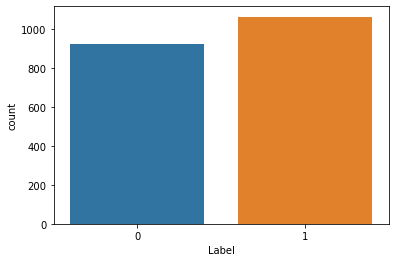

In [32]:
sns.countplot(news['Label'])

In [33]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1989 non-null   object
 1   Label   1989 non-null   int64 
 2   Top1    1989 non-null   object
 3   Top2    1989 non-null   object
 4   Top3    1989 non-null   object
 5   Top4    1989 non-null   object
 6   Top5    1989 non-null   object
 7   Top6    1989 non-null   object
 8   Top7    1989 non-null   object
 9   Top8    1989 non-null   object
 10  Top9    1989 non-null   object
 11  Top10   1989 non-null   object
 12  Top11   1989 non-null   object
 13  Top12   1989 non-null   object
 14  Top13   1989 non-null   object
 15  Top14   1989 non-null   object
 16  Top15   1989 non-null   object
 17  Top16   1989 non-null   object
 18  Top17   1989 non-null   object
 19  Top18   1989 non-null   object
 20  Top19   1989 non-null   object
 21  Top20   1989 non-null   object
 22  Top21   1989 non-null   

In [34]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1989 non-null   object 
 1   Open       1989 non-null   float64
 2   High       1989 non-null   float64
 3   Low        1989 non-null   float64
 4   Close      1989 non-null   float64
 5   Volume     1989 non-null   int64  
 6   Adj Close  1989 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 108.9+ KB


---

#### Join the data on date field

In [37]:
merged = news.merge(stock, how='inner', on='Date', left_index=True)

In [81]:
merged.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Close,Volume,Adj Close,all_news,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
1988,08-08-2008,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,11734.32031,212830000,11734.32031,Georgia downs two Russian warplanes as countri...,0.267549,-0.048568,-0.9983,0.212,0.729,0.059
1987,11-08-2008,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,11782.34961,183190000,11782.34961,Why wont America and Nato help us? If they won...,0.374806,0.121956,-0.9977,0.202,0.738,0.061
1986,12-08-2008,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,11642.46973,173590000,11642.46973,Remember that adorable 9-year-old who sang at ...,0.536234,-0.044302,-0.9975,0.225,0.684,0.091
1985,13-08-2008,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,11532.95996,182550000,11532.95996,U.S. refuses Israel weapons to attack Iran: r...,0.364021,0.011398,-0.9571,0.132,0.767,0.102
1984,14-08-2008,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,11615.92969,159790000,11615.92969,All the experts admit that we should legalise ...,0.375099,0.040677,-0.9644,0.148,0.758,0.094


#### Combine all news headlines into a single column

In [40]:
headlines = []

for row in range(0, len(merged.index)):
    headlines.append(' '.join( str(x) for x in merged.iloc[row, 2:27]) )

In [41]:
headlines[0]

'b"Georgia \'downs two Russian warplanes\' as countries move to brink of war" b\'BREAKING: Musharraf to be impeached.\' b\'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)\' b\'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire\' b"Afghan children raped with \'impunity,\' U.N. official says - this is sick, a three year old was raped and they do nothing" b\'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.\' b"Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO\'s side" b"The \'enemy combatent\' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." b\'Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]\' b\'Did the U.S. Prep Georgia for War with Russia?\'

#### Cleaning the dataset :

In [43]:
c_headlines = []

for i in range(0, len(headlines)):
    c_headlines.append(re.sub("b[(')]", '', headlines[i]))
    c_headlines[i] = re.sub('b[(")]', '', c_headlines[i])
    c_headlines[i] = re.sub("\'", '', c_headlines[i])

In [45]:
c_headlines[20]

'A French judge has ordered two branches of Scientologists and their leaders to stand trial for fraud   Russia in legal bid to ban South Park 60 Minutes Cut Ahmadinejads Statement, Solution Is Democracy in Israel/Palestine" U.S. drones kill 13 in missile attack in Pakistan Screw You, TSA: No Conviction on Key Charges in Liquid-Bomb Trial in London Scientology on trial for fraud in France! An EU ban on ads with sexist overtones? Another quasi-fictional piece of translucent flimflam Film Backs Afghans Claims of US Killings [of 90+ civilians] Giant Buddha found at Afghan site. After denying strenously the US reopens inquiry into Afghan attack that may have killed upto 90 civilians Videos surface showing dead Afghan children after US raid, sparking a new investigation "Consortium" of Media Execs to Canadian Green Party:  You can\\t participate in debate because the other parties don\\t want you there. Everything going wrong in the world .. in one convenient graphical display.  Until yester

#### Add new column to the merged dataset :

In [46]:
merged['all_news'] = c_headlines

In [50]:
merged['all_news'][20]

'A seven-year-old boy who went missing in bear-inhabited forests in northern Japan after his parents said they abandoned him as punishment, has been found alive, according to local reports. Families of victims murdered by Colombian paramilitaries are one step closer to achieving justice for their loved ones as a United States judge gave the green light for a federal lawsuit against former executives of the U.S. fruit company Chiquita. Young fish become hooked on eating plastic in the seas in the same way that teenagers prefer unhealthy fast food, Swedish researchers have said Cyclist died after three ambulances could not find Olympic velodrome: London Ambulance Service took 27 minutes to reach venue because satnavs had not been updated since 2012 Games President Obama defended his declining military budgets and reluctance to use military force in Syria Thursday, saying the U.S. made mistakes when it overreached in Vietnam and Iraq. Thailand Creating Forests By Dropping Millions Of Tree

In [51]:
merged.head(5)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close,all_news
1988,08-08-2008,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.08984,11759.95996,11388.04004,11734.32031,212830000,11734.32031,Georgia downs two Russian warplanes as countri...
1987,11-08-2008,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11729.66992,11867.11035,11675.53027,11782.34961,183190000,11782.34961,Why wont America and Nato help us? If they won...
1986,12-08-2008,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",11781.70020,11782.34961,11601.51953,11642.46973,173590000,11642.46973,Remember that adorable 9-year-old who sang at ...
1985,13-08-2008,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,11632.80957,11633.78027,11453.33984,11532.95996,182550000,11532.95996,U.S. refuses Israel weapons to attack Iran: r...
1984,14-08-2008,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...,11532.07031,11718.28027,11450.88965,11615.92969,159790000,11615.92969,All the experts admit that we should legalise ...


---

#### Functions to get polarity and subjectivity :

In [56]:
def PolarityScore(text):
    return TextBlob(text).sentiment.polarity

In [57]:
def SubjectivityScore(text):
    return TextBlob(text).sentiment.subjectivity

#### Add 2 new columns  'Polarity'  and  'Subjectivity'

In [58]:
merged['Subjectivity'] = merged['all_news'].apply(SubjectivityScore)
merged['Polarity'] = merged['all_news'].apply(PolarityScore)

In [59]:
merged.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top25,Open,High,Low,Close,Volume,Adj Close,all_news,Subjectivity,Polarity
1988,08-08-2008,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,"b""No Help for Mexico's Kidnapping Surge""",11432.08984,11759.95996,11388.04004,11734.32031,212830000,11734.32031,Georgia downs two Russian warplanes as countri...,0.267549,-0.048568
1987,11-08-2008,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,"b""So this is what it's come to: trading sex fo...",11729.66992,11867.11035,11675.53027,11782.34961,183190000,11782.34961,Why wont America and Nato help us? If they won...,0.374806,0.121956
1986,12-08-2008,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",11781.70020,11782.34961,11601.51953,11642.46973,173590000,11642.46973,Remember that adorable 9-year-old who sang at ...,0.536234,-0.044302


#### Function to get Sentiment Score

In [60]:
def SentimentScore(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    return sentiment

#### Sentiment scores for each day :

In [61]:
compound = []
neg = []
pos = []
neu = []
SIA = 0

In [62]:
for i in range(0, len(merged['all_news'])):
    SIA = SentimentScore(merged['all_news'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    neu.append(SIA['neu'])
    pos.append(SIA['pos'])

In [63]:
merged['Compound'] = compound
merged['Negative'] = neg
merged['Neutral'] = neu
merged['Positive'] = pos

In [64]:
merged.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Close,Volume,Adj Close,all_news,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
1988,08-08-2008,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,11734.32031,212830000,11734.32031,Georgia downs two Russian warplanes as countri...,0.267549,-0.048568,-0.9983,0.212,0.729,0.059
1987,11-08-2008,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,11782.34961,183190000,11782.34961,Why wont America and Nato help us? If they won...,0.374806,0.121956,-0.9977,0.202,0.738,0.061
1986,12-08-2008,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,11642.46973,173590000,11642.46973,Remember that adorable 9-year-old who sang at ...,0.536234,-0.044302,-0.9975,0.225,0.684,0.091
1985,13-08-2008,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,11532.95996,182550000,11532.95996,U.S. refuses Israel weapons to attack Iran: r...,0.364021,0.011398,-0.9571,0.132,0.767,0.102
1984,14-08-2008,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,11615.92969,159790000,11615.92969,All the experts admit that we should legalise ...,0.375099,0.040677,-0.9644,0.148,0.758,0.094


#### List of useful columns :

In [65]:
columns = ['Open', 'High', 'Low', 'Volume', 'Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral', 'Positive', 'Label']

In [66]:
data = merged[columns]
data.head()

,Open,High,Low,Volume,Subjectivity,Polarity,Compound,Negative,Neutral,Positive,Label
1988,11432.08984,11759.95996,11388.04004,212830000,0.267549,-0.048568,-0.9983,0.212,0.729,0.059,0
1987,11729.66992,11867.11035,11675.53027,183190000,0.374806,0.121956,-0.9977,0.202,0.738,0.061,1
1986,11781.70020,11782.34961,11601.51953,173590000,0.536234,-0.044302,-0.9975,0.225,0.684,0.091,0
1985,11632.80957,11633.78027,11453.33984,182550000,0.364021,0.011398,-0.9571,0.132,0.767,0.102,0
1984,11532.07031,11718.28027,11450.88965,159790000,0.375099,0.040677,-0.9644,0.148,0.758,0.094,1


---

### Feature Dataset :

In [67]:
X = data

In [68]:
X = np.array(X.drop(['Label'],1))

### Target Dataset :

In [70]:
Y = np.array(data['Label'])

----

### Spliting data into training and testing datasets (80-20)

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=0)

In [72]:
model = LinearDiscriminantAnalysis().fit(X_train, Y_train)

In [75]:
prediction = model.predict(X_test)
prediction

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,

In [76]:
Y_test

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,

### Testing the model metrics :

In [78]:
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       193
           1       0.82      0.89      0.85       205

    accuracy                           0.84       398
   macro avg       0.84      0.84      0.84       398
weighted avg       0.84      0.84      0.84       398



### Therefore, the model is about 84% accurate.